Data Set Characteristics:

Number of Instances:
20640

Number of Attributes:
8 numeric, predictive attributes and the target

Attribute Information:
MedInc median income in block group

HouseAge median house age in block group

AveRooms average number of rooms per household

AveBedrms average number of bedrooms per household

Population block group population

AveOccup average number of household members

Latitude block group latitude

Longitude block group longitude

Missing Attribute Values:
None

This dataset was obtained from the StatLib repository. https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

A household is a group of people residing within a home. Since the average number of rooms and bedrooms in this dataset are provided per household, these columns may take surprisingly large values for block groups with few households and many empty houses, such as vacation resorts.

It can be downloaded/loaded using the sklearn.datasets.fetch_california_housing function.

# 线性回归预测房价
## 任务
基于给定的数据，建立线性回归模型，预测未知房屋的价格。
1. 以MedInc为输入变量，建立单因子模型，评估模型表现，并进行可视化展示。
2. 以MedInc、HouseAge、AveRooms、Population、AveOccup为输入变量，建立多因子模型，评估模型表现，并进行可视化展示。
3. 预测MedInc=6.5、HouseAge=5、AveRooms=5、Population=30000、AveOccup=2.1的房屋价格。

In [42]:
# load the data
import pandas as pd
import numpy as np
data = pd.read_csv('./california_housing.csv')
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


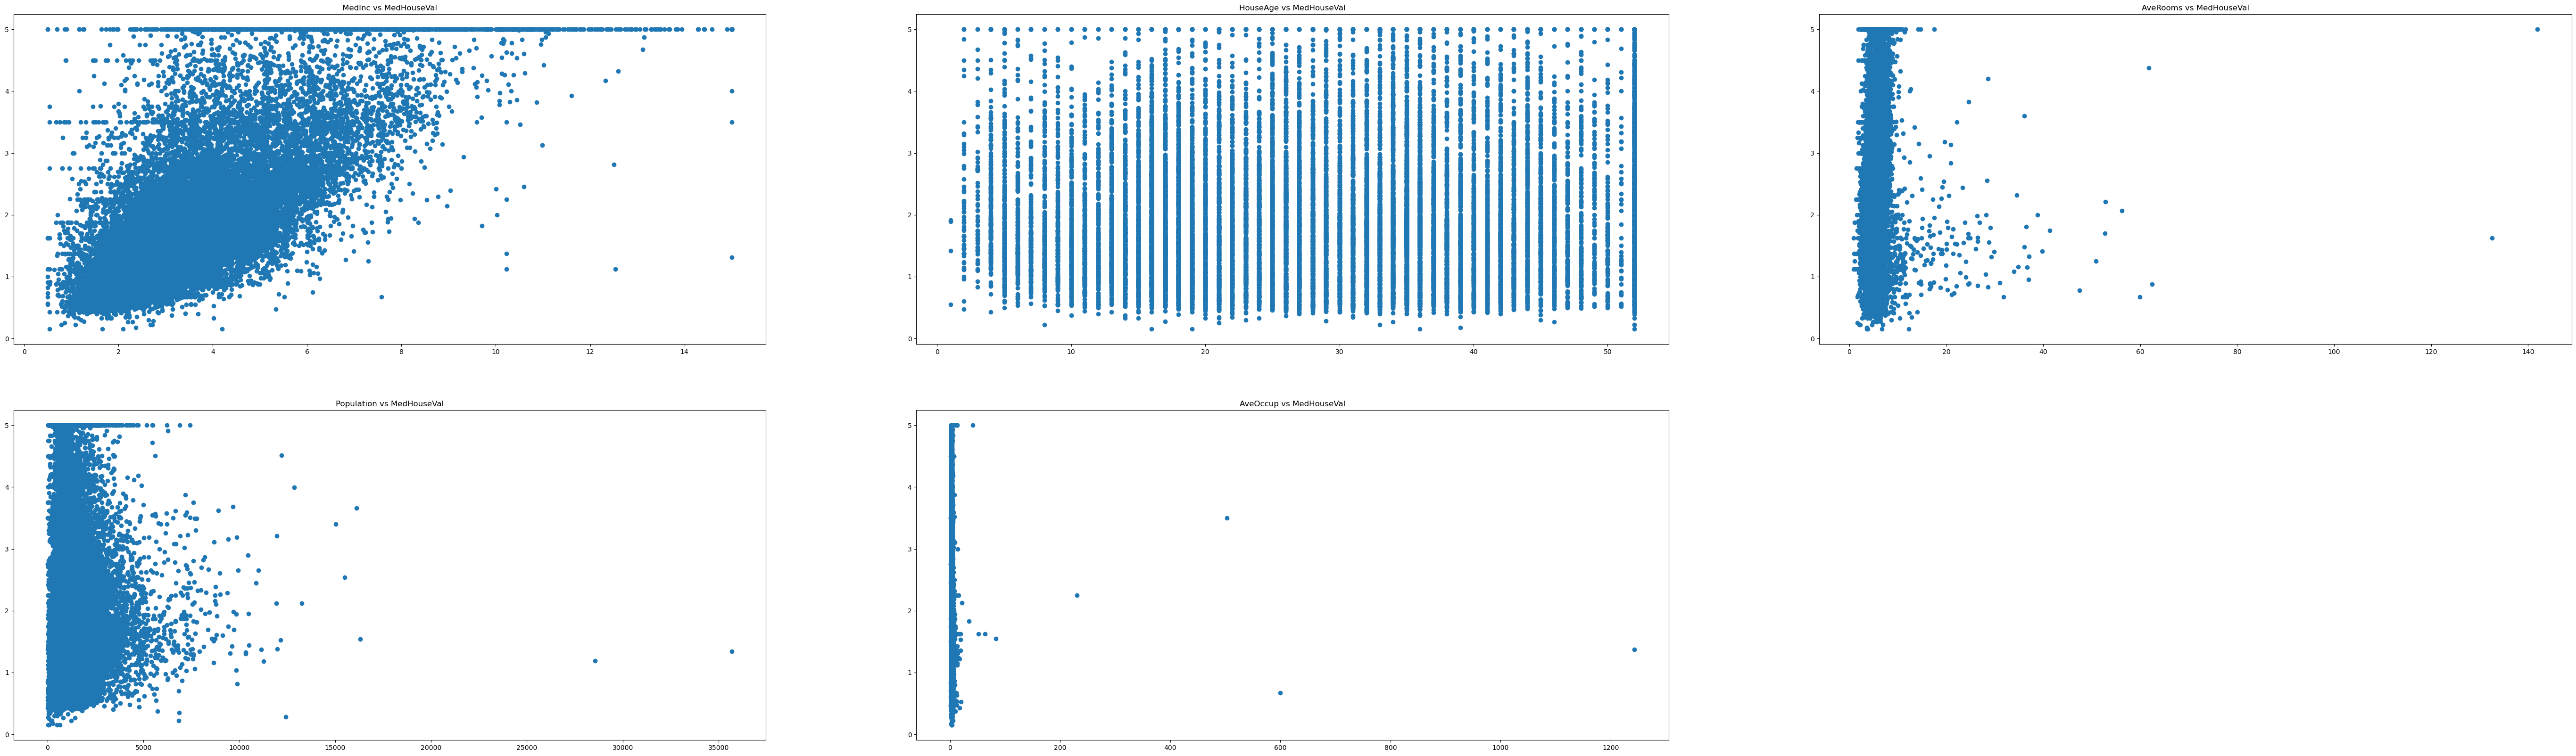

In [43]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(70, 20))
fig1 = plt.subplot(231)
plt.scatter(data.loc[:,'MedInc'],data.loc[:,'MedHouseVal'])
plt.title('MedInc vs MedHouseVal')

fig2 = plt.subplot(232)
plt.scatter(data.loc[:,'HouseAge'],data.loc[:,'MedHouseVal'])
plt.title('HouseAge vs MedHouseVal')

fig3 = plt.subplot(233)
plt.scatter(data.loc[:,'AveRooms'],data.loc[:,'MedHouseVal'])
plt.title('AveRooms vs MedHouseVal')

fig4 = plt.subplot(234)
plt.scatter(data.loc[:,'Population'],data.loc[:,'MedHouseVal'])
plt.title('Population vs MedHouseVal')

fig5 = plt.subplot(235)
plt.scatter(data.loc[:,'AveOccup'],data.loc[:,'MedHouseVal'])
plt.title('AveOccup vs MedHouseVal')
plt.show()

In [44]:
# define X and y
X = data.loc[:,'MedInc']
y = data.loc[:,'MedHouseVal']
X = np.array(X).reshape(-1, 1)
print(X.shape)
print(y.shape)

(20640, 1)
(20640,)


In [45]:
# set up the linear regression model
from sklearn.linear_model import LinearRegression
LR1 = LinearRegression()
# train the model
LR1.fit(X,y)

LinearRegression()

In [46]:
# calculate the MedHouseVal vs MedInc
y_predict_1 = LR1.predict(X)
print(y_predict_1)

[3.9302773  3.92033036 3.48400258 ... 1.1613512  1.23123052 1.44914365]


In [47]:
# evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error_1 = mean_squared_error(y, y_predict_1)
r2_score_1 = r2_score(y, y_predict_1)
print(mean_squared_error_1)
print(r2_score_1)

0.7011311502929527
0.4734474918071989


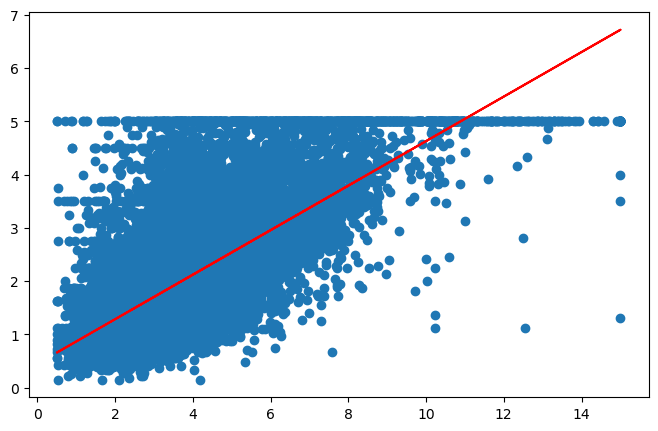

In [48]:
fig6 = plt.figure(figsize=(8,5))
plt.scatter(X, y)
plt.plot(X, y_predict_1, color='red')
plt.show()

In [49]:
# 实现多因子
# define X_multi
X_multi = data.drop(['MedHouseVal'], axis=1)
X_multi

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [50]:
# set up the model
LR_multi = LinearRegression()

# train the model
LR_multi.fit(X_multi, y)


LinearRegression()

In [51]:
# make predictions
y_predict_multi = LR_multi.predict(X_multi)
print(y_predict_multi)

[4.13164983 3.97660644 3.67657094 ... 0.17125141 0.31910524 0.51580363]


In [52]:
mean_squared_error_multi = mean_squared_error(y, y_predict_multi)
r2_score_multi = r2_score(y, y_predict_multi)
print(mean_squared_error_multi)
print(r2_score_multi)


0.5243209861846072
0.606232685199805


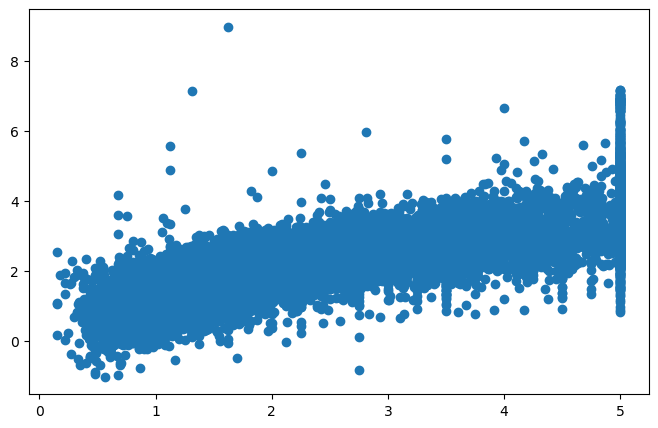

In [53]:
fig7 = plt.figure(figsize=(8,5))
plt.scatter(y, y_predict_multi)
plt.show()

In [54]:
X_test = [6.5,10,5,2,300,2.1,37.88,-122.23]
X_test = np.array(X_test).reshape(1, -1)
print(X_test)

[[   6.5    10.      5.      2.    300.      2.1    37.88 -122.23]]


In [55]:
y_test_predict = LR_multi.predict(X_test)
print(y_test_predict)

[3.88654812]


/opt/anaconda3/envs/imooc_ai/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


线性回归房价summary:
1. 通过搭建线性回归模型，实现了单因子对房价的预测；
2. 在单因子模型效果不好的情况下，通过搭建多因子模型，实现了多因子对房价的预测；
3. 对模型进行了评估，通过均方误差和R2分数对模型进行了评价。
4. 实现了预测结果的可视化展示，直观对比预测价格与实际价格的差异